# mss


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Image Collection and Labeling

In [ ]:
# 📦 Import necessary libraries
import os
import numpy as np
from PIL import Image
import pickle

# ✅ Define base directory
data_dir = "/content/drive/MyDrive/data/PROJECT SEM 8/phase2_data"

# ✅ Define MSS and Non-MSS image directories
mss_dir = os.path.join(data_dir, "long")               # Folder for MSS images
non_mss_dir = os.path.join(data_dir, "Not unicorn 3")  # Folder for Non-MSS images

# 🖼️ Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert("RGB")  # Convert image to RGB format
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    return images

# 📥 Load MSS and Non-MSS images
mss_images = load_images_from_folder(mss_dir)
non_mss_images = load_images_from_folder(non_mss_dir)

# 🏷️ Create labels
mss_labels = [1] * len(mss_images)      # Label 1 for MSS
non_mss_labels = [0] * len(non_mss_images)  # Label 0 for Non-MSS

# 🧠 Combine images and labels
images = mss_images + non_mss_images
labels = mss_labels + non_mss_labels

# 💾 Save the loaded dataset for future use
with open("loaded_images.pkl", "wb") as f:
    pickle.dump(images, f)
with open("loaded_labels.pkl", "wb") as f:
    pickle.dump(labels, f)

print("✅ Dataset loaded and saved successfully!")


✅ Dataset loaded and saved successfully!


# 2: Exploratory Data Analysis (EDA)

###2.1. Visualizing Sample Images

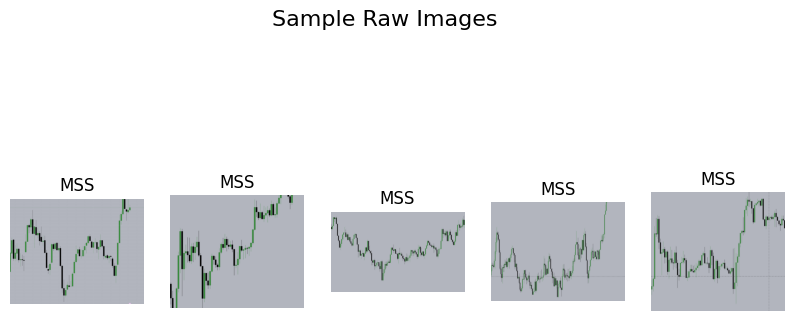

In [ ]:
import matplotlib.pyplot as plt

# Load dataset
with open("loaded_images.pkl", "rb") as f:
    images = pickle.load(f)
with open("loaded_labels.pkl", "rb") as f:
    labels = pickle.load(f)

# Function to plot images
def plot_images(images, labels, title, save_path):
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.title("MSS" if labels[i] == 1 else "Non-MSS")
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.savefig(save_path)  # Save the plot
    plt.show()

# Plot and save raw images
plot_images(images, labels, "Sample Raw Images", "raw_images_plot.png")

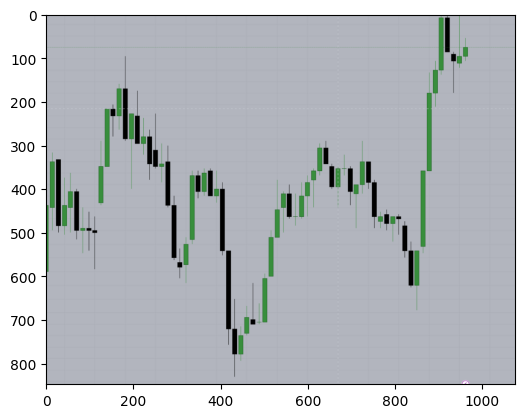

In [ ]:
plt.imshow(np.array(images[0]))
plt.show()


###2.2. Class Distribution (Bar Plot)

<ipython-input-43-85e72f403c8d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")


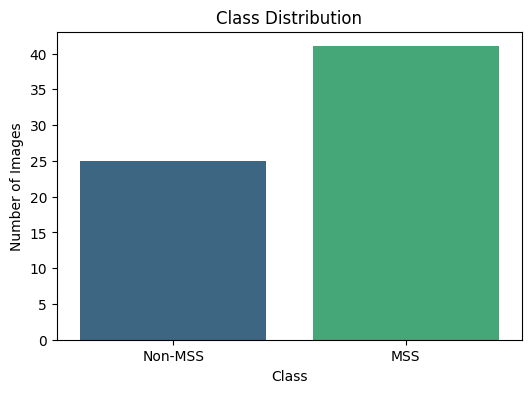

In [ ]:
import seaborn as sns

# Count class occurrences
label_counts = { "Non-MSS": labels.count(0), "MSS": labels.count(1) }

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()), palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.savefig("class_distribution.png")
plt.show()


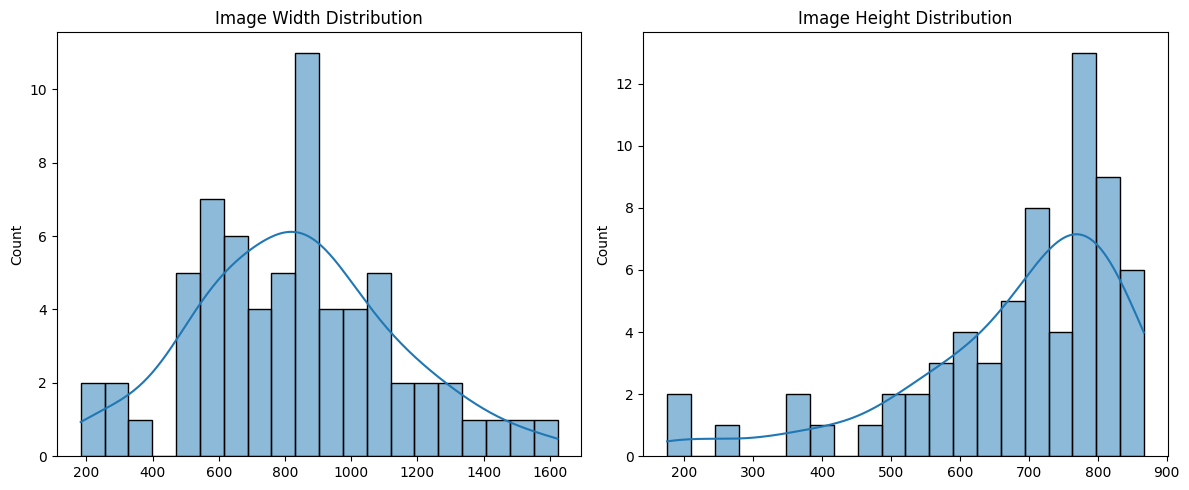

In [ ]:
# Extract image dimensions
widths, heights = zip(*[img.size for img in images])

# Plot width & height distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20, kde=True)
plt.title("Image Width Distribution")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20, kde=True)
plt.title("Image Height Distribution")

plt.tight_layout()
plt.savefig("image_size_distribution.png")
plt.show()


# 3: Data Splitting

## 📏  Data Splitting (Train-Test)

In [ ]:
# ===================================================
# 🧪 Step 3: Data Splitting (Train-Test)
# ===================================================

from sklearn.model_selection import train_test_split
import pickle

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Save split datasets
with open("X_train.pkl", "wb") as f:
    pickle.dump(X_train, f)
with open("X_test.pkl", "wb") as f:
    pickle.dump(X_test, f)
with open("y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)
with open("y_test.pkl", "wb") as f:
    pickle.dump(y_test, f)

print("✅ Dataset split and saved successfully!")
print(f"Training images: {len(X_train)}")
print(f"Testing images: {len(X_test)}")


✅ Dataset split and saved successfully!
Training images: 52
Testing images: 14


#4: Image Preprocessing

In [ ]:
# ===================================================
# 🧹 Step 4.1: Resizing Images to 224x224
# ===================================================

from PIL import Image
import numpy as np
import pickle

# Function to resize images
def resize_images(images, size=(224, 224)):
    resized_images = []
    for img in images:
        resized_img = img.resize(size)
        resized_images.append(resized_img)
    return resized_images

# Load split datasets
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

# Resize images
X_train_resized = resize_images(X_train)
X_test_resized = resize_images(X_test)

# Save resized images
with open("X_train_resized.pkl", "wb") as f:
    pickle.dump(X_train_resized, f)
with open("X_test_resized.pkl", "wb") as f:
    pickle.dump(X_test_resized, f)

print("✅ Images resized and saved successfully!")


✅ Images resized and saved successfully!


### 4.1 visualize original and resized images side-by-side

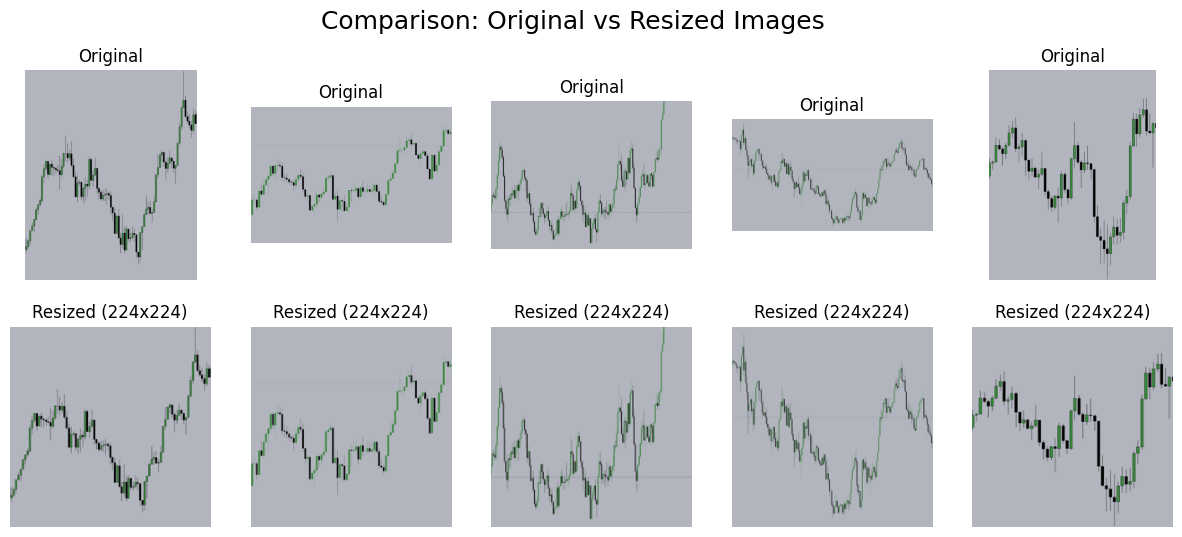

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load original and resized images (if not already loaded)
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_train_resized.pkl", "rb") as f:
    X_train_resized = pickle.load(f)

def compare_original_resized(original_imgs, resized_imgs, num_images=5):
    plt.figure(figsize=(15, 6))
    for i in range(num_images):
        # Original image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(np.array(original_imgs[i]))
        plt.title("Original")
        plt.axis('off')

        # Resized image
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(np.array(resized_imgs[i]))
        plt.title("Resized (224x224)")
        plt.axis('off')
    plt.suptitle("Comparison: Original vs Resized Images", fontsize=18)
    plt.show()

# Call the function to compare
compare_original_resized(X_train, X_train_resized)


### 4.2 1️⃣ Pixel Intensity Distribution Comparison


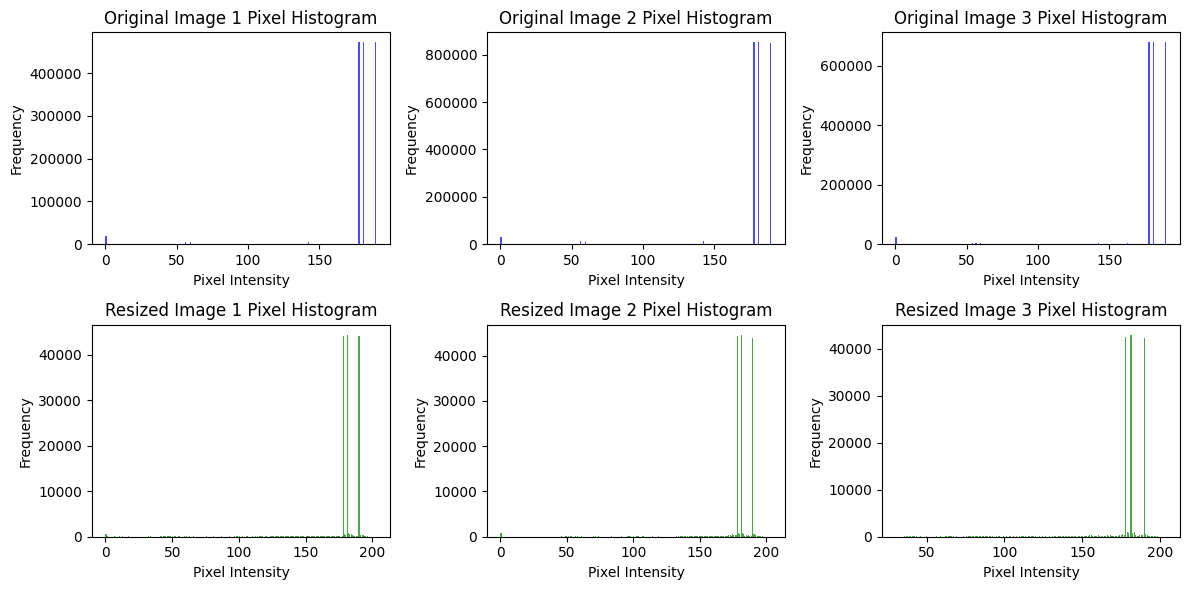

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pixel_histograms(original_imgs, resized_imgs, num_images=3):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        plt.subplot(2, num_images, i+1)
        plt.hist(np.array(original_imgs[i]).ravel(), bins=256, color='blue', alpha=0.7)
        plt.title(f"Original Image {i+1} Pixel Histogram")
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

        plt.subplot(2, num_images, i+1+num_images)
        plt.hist(np.array(resized_imgs[i]).ravel(), bins=256, color='green', alpha=0.7)
        plt.title(f"Resized Image {i+1} Pixel Histogram")
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_pixel_histograms(X_train, X_train_resized)


### 4.3 Mean and Std Dev Comparison

In [ ]:
def mean_std_stats(images, size=(224, 224), num_images=50):
    pixels = []
    for img in images[:num_images]:
        img_resized = img.resize(size)  # resize here
        pixels.append(np.array(img_resized))
    pixels = np.array(pixels)
    mean = pixels.mean(axis=(0,1,2))
    std = pixels.std(axis=(0,1,2))
    return mean, std
mean_orig, std_orig = mean_std_stats(X_train)
mean_resized, std_resized = mean_std_stats(X_train_resized)

print("Original Images Mean (RGB):", mean_orig)
print("Original Images Std Dev (RGB):", std_orig)
print("Resized Images Mean (RGB):", mean_resized)
print("Resized Images Std Dev (RGB):", std_resized)


Original Images Mean (RGB): [170.90334702 175.51297473 182.44204919]
Original Images Std Dev (RGB): [28.20581315 24.43982285 30.05433933]
Resized Images Mean (RGB): [170.90334702 175.51297473 182.44204919]
Resized Images Std Dev (RGB): [28.20581315 24.43982285 30.05433933]


# Step 5: Fluctuating Median Line Extraction and Image Normalization

##5.1 Median Line Extraction
##### Extract the fluctuating median line from candlestick images by detecting contours and connecting midpoints to highlight the price movement trends visually.

In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

def extract_fluctuating_median_line(image):
    # Convert to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    # Threshold to binarize
    _, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Blank image for median line
    median_line_image = np.zeros_like(gray)

    # Draw midpoints of candlesticks
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        midpoint_x = x + w // 2
        midpoint_y = y + h // 2
        cv2.circle(median_line_image, (midpoint_x, midpoint_y), 2, (255, 255, 255), -1)

    # Connect midpoints with lines
    points = np.column_stack(np.where(median_line_image > 0))
    points = points[np.argsort(points[:, 1])]  # sort by x

    for i in range(len(points) - 1):
        cv2.line(median_line_image, tuple(points[i][::-1]), tuple(points[i+1][::-1]), (255, 255, 255), 1)

    return median_line_image

# Extract median lines from resized images
X_train_median = [extract_fluctuating_median_line(img) for img in X_train_resized]
X_test_median = [extract_fluctuating_median_line(img) for img in X_test_resized]

# Save median line images
with open("X_train_median_updated.pkl", "wb") as f:
    pickle.dump(X_train_median, f)
with open("X_test_median_updated.pkl", "wb") as f:
    pickle.dump(X_test_median, f)

print("Fluctuating median lines extracted and saved successfully!")


Fluctuating median lines extracted and saved successfully!


##5.2 Image Normalization
##### Normalize the extracted median line images to scale pixel values between 0 and 1.

In [ ]:
def normalize_images(images):
    normalized_images = []
    for img in images:
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        normalized_images.append(img_array)
    return normalized_images

# Normalize median line images
X_train_normalized = normalize_images(X_train_median)
X_test_normalized = normalize_images(X_test_median)

# Save normalized images
with open("X_train_normalized.pkl", "wb") as f:
    pickle.dump(X_train_normalized, f)
with open("X_test_normalized.pkl", "wb") as f:
    pickle.dump(X_test_normalized, f)

print("Images normalized and saved successfully!")


Images normalized and saved successfully!


##5.3 Visualization of Preprocessing Steps
#####Visualize the original, resized, median line extracted, and normalized images side-by-side for comparison.

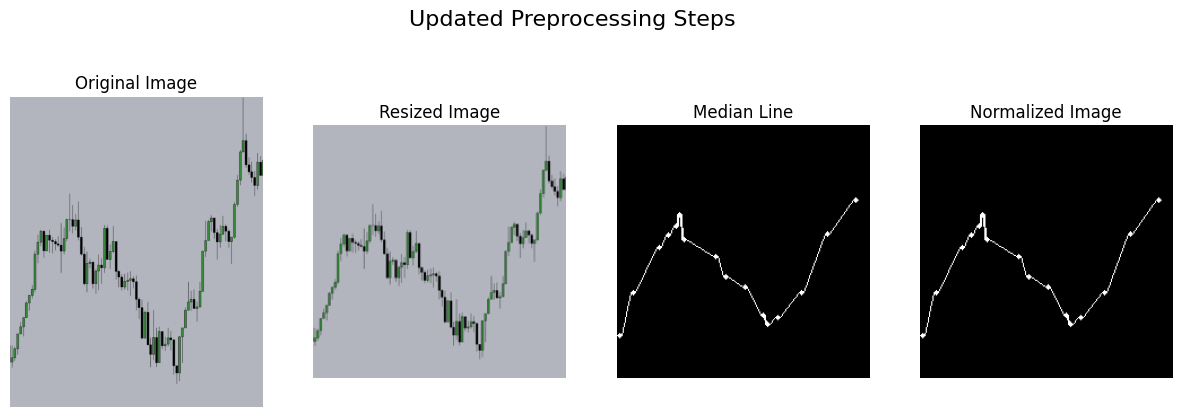

In [ ]:
def visualize_updated_preprocessing(original, resized, median, normalized, save_path):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(resized)
    plt.title("Resized Image")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(median, cmap="gray")
    plt.title("Median Line")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(normalized, cmap="gray")
    plt.title("Normalized Image")
    plt.axis("off")

    plt.suptitle("Updated Preprocessing Steps", fontsize=16)
    plt.savefig(save_path)
    plt.show()

# Visualize sample image preprocessing
sample_index = 0
visualize_updated_preprocessing(
    original=X_train[sample_index],
    resized=X_train_resized[sample_index],
    median=X_train_median[sample_index],
    normalized=X_train_normalized[sample_index],
    save_path="updated_preprocessing_steps.png"
)


##5.4 Optional: Final Image Preprocessing for Model Input
#####Resize, grayscale, and normalize images to a fixed smaller size and range [-1, 1] as final preprocessing step for model training.

In [ ]:
from PIL import Image
import numpy as np
import pickle

def preprocess_images(images, size=(64, 64)):
    processed_images = []
    for img in images:
        img_resized = img.resize(size)
        if img_resized.mode != 'L':
            img_resized = img_resized.convert('L')
        img_array = np.array(img_resized)
        img_array = (img_array / 127.5) - 1  # Normalize to [-1, 1]
        processed_images.append(img_array)
    return np.array(processed_images)

# Load original split datasets
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

# Preprocess images for model input
X_train_processed = preprocess_images(X_train, size=(64, 64))
X_test_processed = preprocess_images(X_test, size=(64, 64))

# Save processed images
with open("X_train_processed.pkl", "wb") as f:
    pickle.dump(X_train_processed, f)
with open("X_test_processed.pkl", "wb") as f:
    pickle.dump(X_test_processed, f)

print("Images preprocessed and saved successfully!")


Images preprocessed and saved successfully!


#📌Step 6: GAN Training for Candlestick Pattern Generation

##📌 6.1 Import Dependencies and Load Data
##### Load all necessary libraries and pickled training data. TensorFlow will be used to build and train the GAN.




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
import numpy as np
import pickle


##📌 6.2 Load and Prepare Training Data
#####Expand image dimension to (64, 64, 1) to match the input shape required by the GAN.

In [ ]:
with open("X_train_processed.pkl", "rb") as f:
    X_train_processed = pickle.load(f)

X_train_gan = np.expand_dims(X_train_processed, axis=-1)  # Shape: (N, 64, 64, 1)
print(f"GAN training dataset shape: {X_train_gan.shape}")


GAN training dataset shape: (52, 64, 64, 1)


##📌6.3 Define the Generator Network
#####The Generator takes a 100-dimensional noise vector and gradually upscales it to generate a 64×64 grayscale image through a series of transposed convolutions.

In [ ]:
def build_generator():
    model = tf.keras.Sequential()
    model.add(Input(shape=(100,)))
    model.add(layers.Dense(8 * 8 * 256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model


##📌6.4 Define the Discriminator Network
#####The Discriminator is a binary classifier that tries to distinguish real images from fake ones.

In [ ]:
def build_discriminator():
    model = tf.keras.Sequential()
    model.add(Input(shape=(64, 64, 1)))
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model


##📌6.5 Compile the Models
#####Compile both models with Adam optimizer and binary cross-entropy.

In [ ]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False  # Freeze discriminator during generator training
gan_input = Input(shape=(100,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


##📌6.6 Train the GAN
#####For each epoch:

Train the discriminator on real images (label=1) and fake images (label=0).

Train the generator to fool the discriminator (label=1 for fake images).

Logs the generator and discriminator losses.

In [ ]:
def train_gan(epochs=50, batch_size=128):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # 1. Train discriminator on real and fake images
        idx = np.random.randint(0, X_train_gan.shape[0], batch_size)
        real_images = X_train_gan[idx]
        noise = np.random.normal(0, 1, (batch_size, 100))
        fake_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # 2. Train generator to fool the discriminator
        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        print(f"Discriminator loss: {d_loss[0]}, Accuracy: {d_loss[1]}")
        print(f"Generator loss: {g_loss}")


##📌 6.7 Start Training

In [ ]:
train_gan(epochs=50, batch_size=128)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Discriminator loss: 10.292402267456055, Accuracy: 0.25
Generator loss: 9.939830780029297
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step
Discriminator loss: 7.855329513549805, Accuracy: 0.4166666865348816
Generator loss: 6.520329475402832
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step
Discriminator loss: 7.366216659545898, Accuracy: 0.44999998807907104
Generator loss: 5.404388904571533
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step
Discriminator loss: 7.2573347091674805, Accuracy: 0.4642857313156128
Generator loss: 4.640749931335449
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step
Discriminator loss: 7.130323886871338, Accuracy: 0.4722222089767456
Generator loss: 4.054174900054932
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step
Discriminator loss: 7.04713249206543, Accuracy: 0.47727274894714355
Generator loss: 3.5735692977905273
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
Discriminator loss: 7.016958236694336, Accuracy: 0.48076921701431274
Generator loss: 3.23644137382

In [ ]:
print("X_train_gan shape:", X_train_gan.shape)


X_train_gan shape: (52, 64, 64, 1)


#Step 7: Build and Train a CNN Model for Image Classification


##🔹 7.1 Import Libraries and Load Data

In [ ]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


##🔹 7.2 Load Processed Image Data and Labels

In [ ]:
# Load image data
with open("X_train_processed.pkl", "rb") as f:
    X = pickle.load(f)  # This contains all training images, normalized and resized (64x64)

# Load corresponding labels
with open("y_train.pkl", "rb") as f:
    y = pickle.load(f)  # Labels for classification (0 or 1)


##🔹 7.3 Prepare the Data for CNN Input

In [ ]:
# Convert to numpy array
X = np.array(X)

# Add a channel dimension: (64, 64) → (64, 64, 1)
X = np.expand_dims(X, axis=-1)

# Convert labels to numpy array
y = np.array(y)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Train set shape: (41, 64, 64, 1)
Validation set shape: (11, 64, 64, 1)


##🔹 7.4 Define the CNN Architecture

In [ ]:
def build_cnn_model(input_shape=(64, 64, 1), num_classes=2):
    model = models.Sequential()

    # First convolutional block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))  # 2-class classification

    return model


##7.5 Compile the CNN Model

In [ ]:
# Instantiate model
cnn_model = build_cnn_model()

# Compile
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
cnn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,882 (2.60 MB)

 Trainable params: 682,882 (2.60 MB)

 Non-trainable params: 0 (0.00 B)

##🔹 7.6 Train the CNN Model

In [ ]:
# Train the model
history = cnn_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=35,
                        batch_size=32)


Epoch 1/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - accuracy: 0.4710 - loss: 0.6856 - val_accuracy: 0.6364 - val_loss: 0.6316
Epoch 2/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.6207 - loss: 0.6499 - val_accuracy: 0.6364 - val_loss: 0.6320
Epoch 3/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.6415 - loss: 0.6457 - val_accuracy: 0.6364 - val_loss: 0.5801
Epoch 4/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - accuracy: 0.6786 - loss: 0.5639 - val_accuracy: 0.9091 - val_loss: 0.6067
Epoch 5/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.6207 - loss: 0.6584 - val_accuracy: 0.8182 - val_loss: 0.6042
Epoch 6/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - accuracy: 0.6845 - loss: 0.6349 - val_accuracy: 0.7273 - val_loss: 0.5397
Epoch 7/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7912 - loss: 0.5822 - val_accuracy: 0.7273 - val_loss: 0.5123
Epoch 8/35
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.7541 - loss: 0.5044 - val_accuracy: 0.7273 - val_loss:

##7.7 Evaluate the CNN Model

In [ ]:
# Evaluate on validation set
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8182 - loss: 1.1462
Validation Loss: 1.1462
Validation Accuracy: 0.8182


##7.8 Visualize Training History

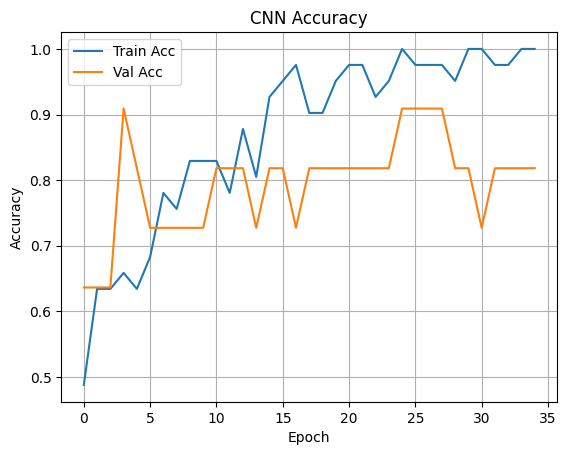

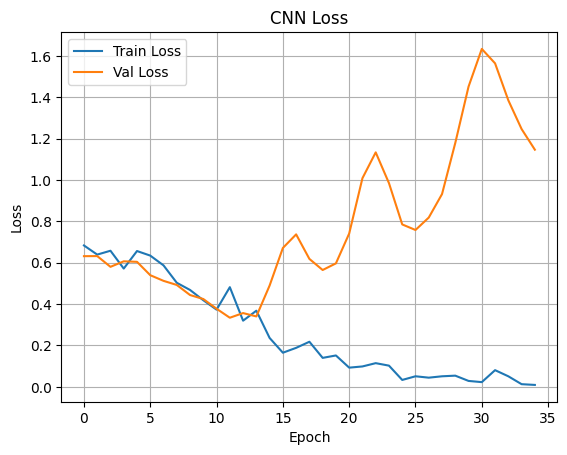

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


#🔶Step 8: ResNet Model for Candlestick Pattern Classification

##8.1 Introduction to ResNet
ResNet (Residual Network) is a powerful deep convolutional neural network architecture introduced by Microsoft Research. It solves the vanishing gradient problem by using skip (residual) connections, enabling the training of very deep networks effectively.

Invented in: 2015 (ResNet-18, 34, 50, 101, 152)

Core idea: y = F(x) + x — learn a residual function instead of a direct mapping.

Ideal for image classification tasks where feature hierarchies are important.

##📦 8.2 Load Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import pickle


##🧠 8.3 Load Preprocessed Data

In [ ]:
# Load preprocessed data (same used for CNN)
with open("X_train_processed.pkl", "rb") as f:
    X_train_processed = pickle.load(f)

with open("X_test_processed.pkl", "rb") as f:
    X_test_processed = pickle.load(f)

with open("y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

with open("y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

# Add channel dimension
X_train_resnet = tf.expand_dims(X_train_processed, axis=-1)
X_test_resnet = tf.expand_dims(X_test_processed, axis=-1)

print(f"Train shape: {X_train_resnet.shape}, Test shape: {X_test_resnet.shape}")


Train shape: (52, 64, 64, 1), Test shape: (14, 64, 64, 1)


##🏗️ 8.4 Build ResNet50 Model

In [ ]:
# Resize images to (224, 224, 3) as ResNet expects 3-channel input
X_train_resnet = tf.image.grayscale_to_rgb(tf.image.resize(X_train_resnet, (224, 224)))
X_test_resnet = tf.image.grayscale_to_rgb(tf.image.resize(X_test_resnet, (224, 224)))

# Define base ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers to use pretrained features
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
resnet_model = Model(inputs=base_model.input, outputs=predictions)


##⚙️ 8.5 Compile the Model

In [ ]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


##🏋️ 8.6 Train the Model

In [ ]:
print(X_train_resnet.shape)

(52, 224, 224, 3)


In [ ]:
print(type(X_train_resnet))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# X_train_resnet = X_train_resnet.astype(np.float32)
# X_test_resnet = X_test_resnet.astype(np.float32)


AttributeError: EagerTensor object has no attribute 'astype'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
# Resize to 224x224
X_train_resnet = tf.image.resize(X_train_resnet, (224, 224))
X_test_resnet = tf.image.resize(X_test_resnet, (224, 224))

# Only convert to RGB if still grayscale
if X_train_resnet.shape[-1] == 1:
    X_train_resnet = tf.image.grayscale_to_rgb(X_train_resnet)
    X_test_resnet = tf.image.grayscale_to_rgb(X_test_resnet)

# Convert tensors to numpy for .fit()
X_train_resnet = X_train_resnet.numpy()
X_test_resnet = X_test_resnet.numpy()


In [ ]:
history_resnet = resnet_model.fit(
    X_train_resnet, y_train,
    validation_data=(X_test_resnet, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.3790 - loss: 0.7139 - val_accuracy: 0.3571 - val_loss: 0.6985
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.7115 - loss: 0.6815 - val_accuracy: 0.5714 - val_loss: 0.6887
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 0.6314 - loss: 0.6591 - val_accuracy: 0.5714 - val_loss: 0.6911
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.6210 - loss: 0.6548 - val_accuracy: 0.5714 - val_loss: 0.7010
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.6522 - loss: 0.6408 - val_accuracy: 0.5714 - val_loss: 0.7129
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.6106 - loss: 0.6704 - val_accuracy: 0.5714 - val_loss: 0.7186
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.6314 - loss: 0.6576 - val_accuracy: 0.5714 - val_loss: 0.7212
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 8s/step - accuracy: 0.6314 - loss: 0.6574 - val_accuracy: 0.5714 - val_loss: 0.7195
Epoch 9/

###8.7: Validation & Visualization of ResNet Model Performance

####8.7.1: Plot Accuracy & Loss Curves

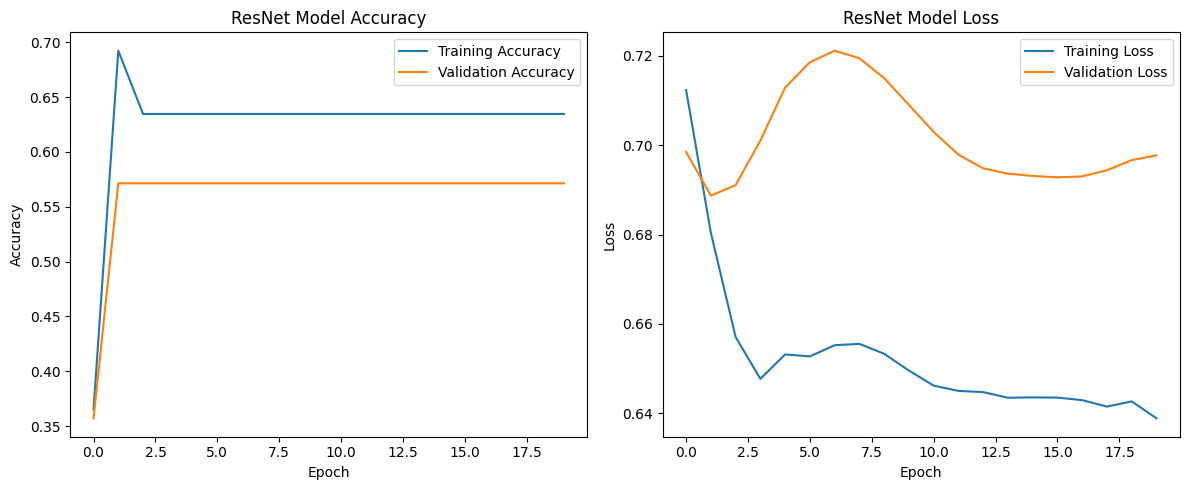

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


####8.7.2: Evaluate Final Accuracy on Test Set

In [ ]:
# Final evaluation
test_loss, test_accuracy = resnet_model.evaluate(X_test_resnet, y_test)
print(f"Final Test Accuracy (ResNet): {test_accuracy:.4f}")
print(f"Final Test Loss (ResNet): {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5714 - loss: 0.6977
Final Test Accuracy (ResNet): 0.5714
Final Test Loss (ResNet): 0.6977


####8.7.3: Classification Report & Confusion Matrix

In [ ]:
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns

# # Predict classes
# y_pred_resnet = resnet_model.predict(X_test_resnet)
# y_pred_classes = (y_pred_resnet > 0.5).astype("int32").flatten()

# # Print report
# print("Classification Report:\n", classification_report(y_test, y_pred_classes))

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred_classes)
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix - ResNet')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


# ✅ Step 9: EfficientNet for Market Structure Shift (MSS) Classification
####EfficientNet is a family of models that scale up CNNs efficiently using a compound scaling method. We'll use EfficientNetB0, which is fast and accurate even for small datasets.


##📌 9.1: Preprocess Input for EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
# Reuse already prepared X_train_resnet and X_test_resnet
X_train_efficient = X_train_resnet
X_test_efficient = X_test_resnet


##📌 9.3: Build the EfficientNetB0 Model

In [ ]:
def build_efficientnet_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
    base_model.trainable = False  # Freeze base model layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

efficientnet_model = build_efficientnet_model()


##📌 9.4: Compile the Model

In [ ]:
efficientnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])


##📌 9.5: Train the Model

In [ ]:
history_efficient = efficientnet_model.fit(
    X_train_efficient, y_train,
    validation_data=(X_test_efficient, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_924']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 8s/step - accuracy: 0.5256 - loss: 0.6802 - val_accuracy: 0.5714 - val_loss: 0.6844
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4688 - loss: 0.6957 - val_accuracy: 0.5714 - val_loss: 0.6830
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6651 - loss: 0.6306 - val_accuracy: 0.5714 - val_loss: 0.6841
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5537 - loss: 0.6880 - val_accuracy: 0.5714 - val_loss: 0.6862
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6082 - loss: 0.6973 - val_accuracy: 0.5714 - val_loss: 0.6892
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.6186 - loss: 0.6389 - val_accuracy: 0.5714 - val_loss: 0.6931
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6314 - loss: 0.6700 - val_accuracy: 0.5714 - val_loss: 0.6966
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6418 - loss: 0.6454 - val_accuracy: 0.5714 - val_loss: 0.7000
Epoch 9/20
2/2 ━━━━━━━━━━━

###9.6.1: Evaluate on Test Data

In [ ]:
loss_efficient, acc_efficient = efficientnet_model.evaluate(X_test_efficient, y_test)
print(f"EfficientNet - Test Loss: {loss_efficient:.4f}, Test Accuracy: {acc_efficient:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step - accuracy: 0.5714 - loss: 0.6982
EfficientNet - Test Loss: 0.6982, Test Accuracy: 0.5714


###📌 9.6.2: Plot Accuracy and Loss Curves

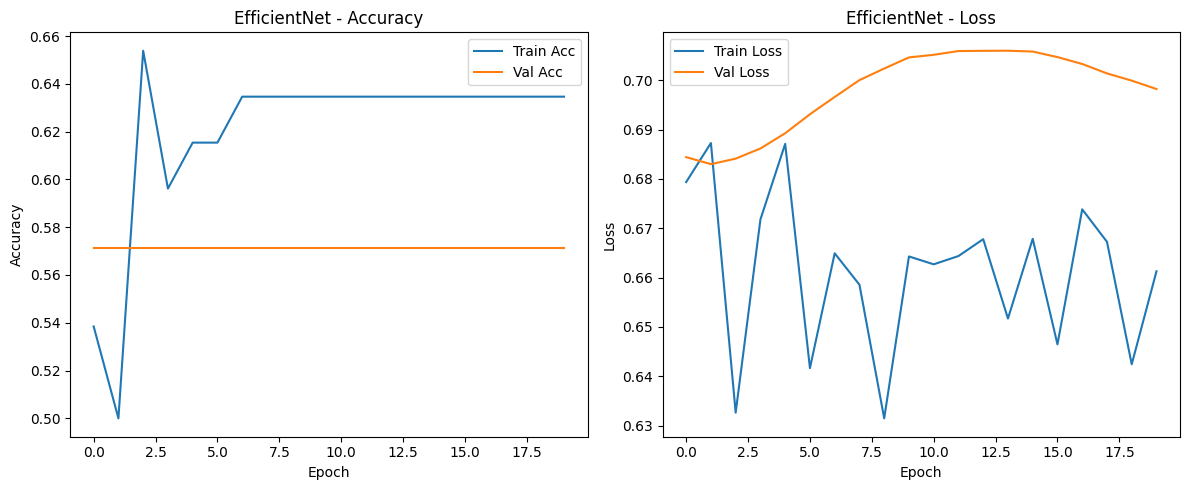

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_efficient, "EfficientNet")


#✅ 10: VGG16 Model Implementation

##📌 10.1: Preprocess Input Data for VGG16

In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow as tf

# Convert each image to NumPy array, resize and preprocess
X_train_vgg = []
for img in X_train:
    img_array = np.array(img)
    img_resized = tf.image.resize(img_array, (224, 224)).numpy()
    if img_resized.ndim == 2:  # if grayscale, expand dims
        img_resized = np.stack((img_resized,) * 3, axis=-1)
    elif img_resized.shape[-1] == 1:
        img_resized = np.repeat(img_resized, 3, axis=-1)
    X_train_vgg.append(preprocess_input(img_resized * 255.0))

X_test_vgg = []
for img in X_test:
    img_array = np.array(img)
    img_resized = tf.image.resize(img_array, (224, 224)).numpy()
    if img_resized.ndim == 2:
        img_resized = np.stack((img_resized,) * 3, axis=-1)
    elif img_resized.shape[-1] == 1:
        img_resized = np.repeat(img_resized, 3, axis=-1)
    X_test_vgg.append(preprocess_input(img_resized * 255.0))

# Convert final lists to NumPy arrays
X_train_vgg = np.array(X_train_vgg)
X_test_vgg = np.array(X_test_vgg)


##10.2: Build the VGG16 Model (Transfer Learning)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model without the top classification layers, include imagenet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers so they are not trained initially
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers on top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Create final model
vgg_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
print("X_train_vgg shape:", X_train_vgg.shape)
print("y_train shape:", y_train.shape)


X_train_vgg shape: (41, 224, 224, 3)
y_train shape: (52,)


In [ ]:
min_len = min(len(X_train_vgg), len(y_train))
X_train_vgg = X_train_vgg[:min_len]
y_train = y_train[:min_len]

min_len_test = min(len(X_test_vgg), len(y_test))
X_test_vgg = X_test_vgg[:min_len_test]
y_test = y_test[:min_len_test]


##Step 10.3: Train the VGG16 Model

In [ ]:
history_vgg = vgg_model.fit(
    X_train_vgg, y_train,
    validation_data=(X_test_vgg, y_test),
    epochs=20,
    batch_size=32
)



Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 38s 15s/step - accuracy: 0.4815 - loss: 4.8231 - val_accuracy: 0.5714 - val_loss: 984.5965
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 13s/step - accuracy: 0.7007 - loss: 2.9758 - val_accuracy: 0.5714 - val_loss: 1548.4023
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 40s 13s/step - accuracy: 0.8874 - loss: 1.2472 - val_accuracy: 0.5714 - val_loss: 1919.9816
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 13s/step - accuracy: 0.8074 - loss: 2.2094 - val_accuracy: 0.5714 - val_loss: 1916.8771
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 15s/step - accuracy: 0.8666 - loss: 0.7907 - val_accuracy: 0.5714 - val_loss: 1535.9772
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 15s/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.6429 - val_loss: 1291.1803
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 15s/step - accuracy: 0.9571 - loss: 0.0907 - val_accuracy: 0.6429 - val_loss: 1205.3448
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 15s/step - accuracy: 0.9571 - loss: 0.2274 - val_accuracy: 0.6429

##10.4 Evaluate the Model

In [ ]:
# Evaluate on test data
vgg_eval = vgg_model.evaluate(X_test_vgg, y_test, verbose=1)
print(f"\nTest Loss: {vgg_eval[0]:.4f}")
print(f"Test Accuracy: {vgg_eval[1]*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4286 - loss: 1653.8412

Test Loss: 1653.8412
Test Accuracy: 42.86%


##10.5 Plot Accuracy & Loss Curves

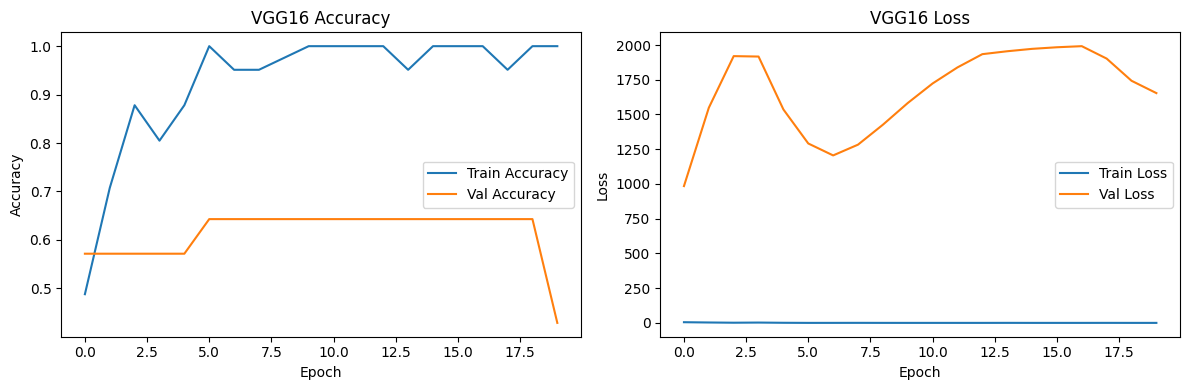

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_vgg.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Val Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_vgg.history['loss'], label='Train Loss')
plt.plot(history_vgg.history['val_loss'], label='Val Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#11. Vision Transformer (ViT)

In [ ]:
!pip install -q transformers datasets timm



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.8 MB/s eta 0:00:00


##Import Required Modules

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import ViTFeatureExtractor, TFViTForImageClassification
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


##Load Pre-trained ViT Model and Feature Extractor

In [ ]:
# Load the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

model_vit = TFViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224-in21k',
    num_labels=2  # Change this if you have more classes
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFViTForImageClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Preprocess the Image Dataset

In [ ]:
from transformers import ViTFeatureExtractor

# Load feature extractor for a standard ViT model with RGB input
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')


In [ ]:
def preprocess_vit(images):
    # If images are floats between 0 and 1, convert to uint8 0-255
    if images.max() <= 1.0:
        images_uint8 = (images * 255).clip(0, 255).astype(np.uint8)
    else:
        images_uint8 = images.astype(np.uint8)

    # Extract pixel values expected by ViT
    processed = [feature_extractor(image=img, return_tensors="np")['pixel_values'][0] for img in images_uint8]
    return np.array(processed)
